### Урок 4. Непрерывные случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. Центральная предельная теорема#

### -- Автор: Шенк Евгений Станиславович

In [1]:
import warnings

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
from scipy import stats

plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')

### Задание 1.

О непрерывной равномерно распределённой случайной величине B известно, что её дисперсия равна 0.2. Можно ли найти правую границу величины B и её среднее значение зная, что левая граница равна 0.5? Если да, найдите их.

$$M(X) = \dfrac{a + b}{2}, \:\: D(X) = \dfrac{(b - a)^2}{12}.$$

Создаем функцию для поиска зачения В зная А и дисперсию:

In [2]:
def func(x):
    return x**2 - x - 2.15

In [3]:
x = fsolve(func, 0.5)
x

array([2.04919334])

b = 2.04919334

In [4]:
a = 0.5
b = x

samples = np.random.uniform(a, b, size=1000000)

Находим среднее значение:

In [5]:
samples.mean()

1.2740466472660414

Проверка:

In [6]:
samples.var(ddof=1)

0.20003623555050115

### Задание 2.

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

Найдите: а) среднее квадратическое отклонение массы коробки

In [7]:
target_norm = 0.05

In [8]:
epsilon = 0.0001 # точность
scale = 1 # начальное отклонение
norm = stats.norm.cdf(x=1, loc=1.06, scale=scale)
while True:
    if norm - target_norm > epsilon:
        scale *= 0.5
    if norm - target_norm < -epsilon:
        scale *= 1.5
    norm = stats.norm.cdf(x=1, loc=1.06, scale=scale)
    if abs(norm - target_norm) < epsilon:
        break
print (f'norm={norm}; scale={scale}')

norm=0.04993720760298726; scale=0.03646390624506175


In [9]:
print(f'Ответ: {scale}')

Ответ: 0.03646390624506175


б) процент коробок, имеющих массу больше 1.1 кг

In [10]:
norm_2 = 1 - stats.norm.cdf(x=1.1, loc=1.06, scale=scale)
print(f'Ответ: {round(norm_2*100, 2)}%')

Ответ: 13.63%


### Задание 3.

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

In [11]:
n = 30
a = 12
b = 14

Для начала создадим выборку случайных значений

In [12]:
def get_samples_uniform(n: int, n_samples: int, a: int, b: int) -> np.ndarray:
    """Возвращает выборку размера `n_samples` из суммы значений равномерно распределённых
    случайных величин взятых `n` раз.
    """
    
    samples = np.random.uniform(a, b, size=(n, n_samples))
    
    return sum(samples)

In [13]:
result = get_samples_uniform(n=n, n_samples=10000, a=a, b=b)
result

array([389.18280674, 387.90746163, 389.98782   , ..., 392.23010947,
       392.22447768, 384.92465846])

(array([0.0001748 , 0.00052439, 0.00148577, 0.00367073, 0.00987601,
        0.01922763, 0.03731908, 0.06074183, 0.08958328, 0.11283123,
        0.12690236, 0.11816253, 0.10688814, 0.0781341 , 0.05235159,
        0.02971543, 0.0155569 , 0.00804065, 0.00192276, 0.00087398]),
 array([377.6333528 , 378.77753957, 379.92172633, 381.0659131 ,
        382.21009986, 383.35428663, 384.49847339, 385.64266016,
        386.78684692, 387.93103369, 389.07522045, 390.21940722,
        391.36359398, 392.50778075, 393.65196752, 394.79615428,
        395.94034105, 397.08452781, 398.22871458, 399.37290134,
        400.51708811]),
 <a list of 20 Patch objects>)

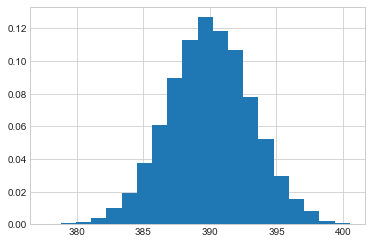

In [14]:
# Строим гасторамму для визуализации распределения
plt.hist(result, density=True, bins=20)

Используем центральную предельную теорему: при большой выборке распределение нашей величины становится всё ближе к нормальному распределению с параметрами: $$a = M(X), \:\: \sigma^2 = \dfrac{D(X)}{n}$$
$$M(X) = \dfrac{a + b}{2}, D(X) = \dfrac{(b - a)^2}{12}$$

In [15]:
# найти вероятность, что масса всей коробки будет: а) меньше 390 граммов
norm_less_390 = stats.norm.cdf(x=390/n, loc=((a+b)/2), scale=np.sqrt(((b-a)**2)/(12*n)))
norm_less_390

0.5

In [16]:
# найти вероятность, что масса всей коробки будет: б) больше 395 граммов
norm_more_395 = 1 - stats.norm.cdf(x=395/n, loc=((a+b)/2), scale=np.sqrt(((b-a)**2)/(12*n)))
norm_more_395

0.05692314900332973

In [17]:
# найти вероятность, что масса всей коробки будет: в) от 380 до 400 граммов
norm_less_380 = stats.norm.cdf(x=380/n, loc=((a+b)/2), scale=np.sqrt(((b-a)**2)/(12*n)))
norm_more_400 = 1 - stats.norm.cdf(x=400/n, loc=((a+b)/2), scale=np.sqrt(((b-a)**2)/(12*n)))
norm_380_to_400 = 1 - norm_less_380 - norm_more_400
norm_380_to_400

0.9984345977419975